# Assessment
Firstly, methods that are needed for implementation are imported. Some of the utilized libraries are listed in the following: Pandas for creating data frame, Scikit-Learn (SKLearn) for plotting confusion matrix and encoding categories, and TensorFlow for preprocessing raw data and deep modelling.


In [2]:
from matplotlib.pyplot import figure, imshow, ion, legend, plot, savefig, show, subplots, title, xlabel, ylabel
from numpy import argmax
from pandas import DataFrame
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Embedding, Flatten, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Variables
All variables that are used during the modelling are defined here. Data frame contains four products with the corresponding description, price and category. There are three categories.

In [3]:
# Data Generation
df, Legends, Location, XLabel, YLabel, Accuracy, figureSize, rangeEpochs, Blue, DPI, OFF, CM = DataFrame({"Name": ["Product 1", "Product 2", "Product 3", "Product 4", "Product 5"], "Description": ["Vaccum Cleaner.", "XBOX One for gaming.", "Spoon and fork pack.", "Betaserc Medicine.", "PS5"], "Price": [10.99, 15.49, 8.99, 12.99, 5.99], "Category": ["House", "Gaming", "House", "Healthcare", "Gaming"]}), ["Train Loss"], "upper right", "Epochs", "Loss", "Accuracy", (13, 5), range(100), "blue", 1200, 0, "Confusion Matrix"

# Preprocessing
All the description are tokenized and got ready for the embedding layer.

In [4]:
# Data Preprocessing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["Description"])
df["Description"] = pad_sequences(tokenizer.texts_to_sequences(df["Description"]), padding = "post")

# Label Encoding
Categories are encoded to the numbers: 0, 1, and 2.

In [5]:
# Encode categorical attributes
df["Category"] = LabelEncoder().fit_transform(df["Category"])

# Training Phase
Creating a neural network with Softmax activation function for output nodes because the task is classification.
Model is trained by the description as the only major feature (X) and the corresponding targets (Categories as y) for 12 epochs.

In [6]:
# Data Training
X, y = df["Description"], df["Category"]

Model = Sequential([Embedding(input_dim = 300, output_dim = 16), Flatten(), Dense(16, activation = "relu"), Dense(3, activation = "softmax")])

Model.compile(loss = "sparse_categorical_crossentropy", metrics = ["Accuracy"], optimizer = "adam")

History = Model.fit(X, y, epochs = 12, verbose = OFF)

# Evaluation
All calculations are depicted in "Evaluations" folder. As there is not enough data and also test data, we have acceptable results for testing the training data using the trained model!

Loss: 1.0645314455032349, Accuracy: 0.6000000238418579


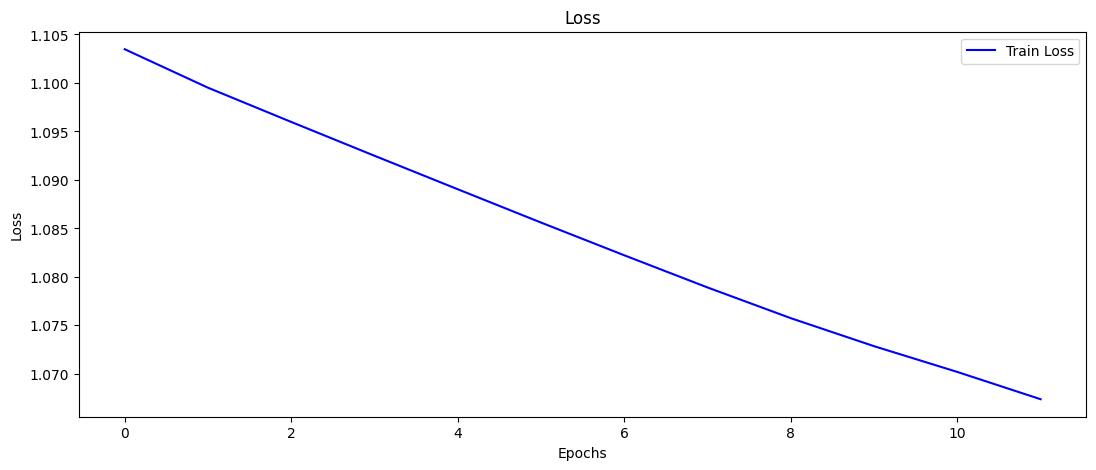

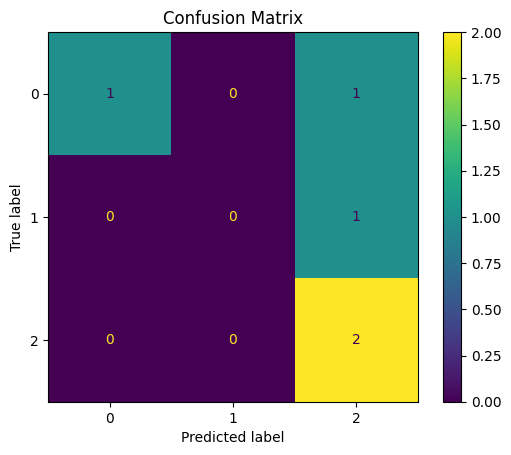

In [ ]:
Loss, Accuracy = Model.evaluate(X, y, verbose = OFF)
print(f"Loss: {Loss}, Accuracy: {Accuracy}")

# Plotting the training history (loss value)
figure(figsize = figureSize)
ion()
plot(History.history["loss"], Blue)
title(YLabel)
ylabel(YLabel)
xlabel(XLabel)
legend(Legends, loc = Location)
savefig(YLabel, dpi = DPI)
show()

# Plotting the training confusion matrix
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y, argmax(Model.predict(X, verbose = OFF), axis = 1))).plot()
title(CM)
savefig(CM, dpi = DPI)
show()